In [1]:
# import pandas as pd # for spreadsheet
# import numpy as np
# import requests #get request
# from bs4 import BeautifulSoup as soup #html parser

In [3]:
pip install requests beautifulsoup4 pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
url = "https://en.wikipedia.org/wiki/States_of_Nigeria"
response = requests.get(url)
html_content = response.content


In [11]:
soup = BeautifulSoup(html_content, 'html.parser')
print(soup)


<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>States of Nigeria - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vect

In [13]:
table = soup.find('table', {'class': 'wikitable sortable'})


In [35]:
first_table

<table class="infobox vevent" style="float: right; width: ;"><tbody><tr><th class="infobox-above summary" colspan="2" style="font-size: 125%; background-color: #F0F0F0; vertical-align: middle">States of Nigeria</th></tr><tr><td class="infobox-image" colspan="2"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Nigeria_location_map.svg"><img class="mw-file-element" data-file-height="734" data-file-width="954" decoding="async" height="231" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/18/Nigeria_location_map.svg/300px-Nigeria_location_map.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/18/Nigeria_location_map.svg/450px-Nigeria_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/18/Nigeria_location_map.svg/600px-Nigeria_location_map.svg.png 2x" width="300"/></a></span></td></tr><tr><th class="infobox-label" scope="row" style="white-space:nowrap;padding-right:0.65em;">Category</th><td class="infobox-data" style="line-he

In [15]:
# Find all tables in the HTML
tables = soup.find_all('table')
print(f"Number of tables found: {len(tables)}")


Number of tables found: 10


In [85]:
# Convert the first table to a DataFrame if a table exists
if tables:
    first_table = tables[4]  # Access the first table
    df = pd.read_html(str(first_table))[0]  # Use pandas to read the table
    print("First table converted to DataFrame:")
    print(df)


First table converted to DataFrame:
                         Name ISO 3166-2 code Seal Location           City  \
                         Name ISO 3166-2 code Seal Location        Capital   
0                        Abia              AB  NaN      NaN        Umuahia   
1                     Adamawa              AD  NaN      NaN           Yola   
2                   Akwa Ibom              AK  NaN      NaN            Uyo   
3                     Anambra              AN  NaN      NaN           Awka   
4                      Bauchi              BA  NaN      NaN         Bauchi   
5                     Bayelsa              BY  NaN      NaN        Yenagoa   
6                       Benue              BE  NaN      NaN        Makurdi   
7                       Borno              BO  NaN      NaN      Maiduguri   
8                 Cross River              CR  NaN      NaN        Calabar   
9                       Delta              DE  NaN      NaN          Asaba   
10                     Ebony

C:\Users\NCC\AppData\Local\Temp\ipykernel_732\3280367345.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(first_table))[0]  # Use pandas to read the table


In [87]:
print(df.columns)  # Display the column names


MultiIndex([(                         'Name',                          'Name'),
            (              'ISO 3166-2 code',               'ISO 3166-2 code'),
            (                         'Seal',                          'Seal'),
            (                     'Location',                      'Location'),
            (                         'City',                       'Capital'),
            (                         'City',                       'Largest'),
            (            'Geopolitical zone',             'Geopolitical zone'),
            (                         'Area',                          'Area'),
            ('Population (2019 estimate)[4]', 'Population (2019 estimate)[4]')],
           )


In [89]:
print(df.isnull().sum())  # Count missing values in each column


Name                           Name                              0
ISO 3166-2 code                ISO 3166-2 code                   1
Seal                           Seal                             37
Location                       Location                         37
City                           Capital                           0
                               Largest                           0
Geopolitical zone              Geopolitical zone                 0
Area                           Area                              0
Population (2019 estimate)[4]  Population (2019 estimate)[4]     0
dtype: int64


In [31]:
df.columns

Index(['States of Nigeria', 'States of Nigeria.1'], dtype='object')

In [91]:
df.head()

Name ISO 3166-2 code Seal Location     City           \
        Name ISO 3166-2 code Seal Location  Capital  Largest   
0       Abia              AB  NaN      NaN  Umuahia      Aba   
1    Adamawa              AD  NaN      NaN     Yola     Yola   
2  Akwa Ibom              AK  NaN      NaN      Uyo      Uyo   
3    Anambra              AN  NaN      NaN     Awka  Onitsha   
4     Bauchi              BA  NaN      NaN   Bauchi   Bauchi   

  Geopolitical zone                       Area Population (2019 estimate)[4]  
  Geopolitical zone                       Area Population (2019 estimate)[4]  
0        South East    6,320 km2 (2,440 sq mi)                       3841943  
1        North East  36,917 km2 (14,254 sq mi)                       4536948  
2       South South    7,081 km2 (2,734 sq mi)                       4780581  
3        South East    4,844 km2 (1,870 sq mi)                       5599910  
4        North East  45,893 km2 (17,719 sq mi)                       7540663

In [99]:
#import pandas as pd

# Assuming your dataset is loaded into a DataFrame named `df`
columns_to_drop = ['ISO 3166-2 code', 'Seal', 'Location', 'City', 'Area']
df = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
print(df)


                         Name Geopolitical zone Population (2019 estimate)[4]
                         Name Geopolitical zone Population (2019 estimate)[4]
0                        Abia        South East                       3841943
1                     Adamawa        North East                       4536948
2                   Akwa Ibom       South South                       4780581
3                     Anambra        South East                       5599910
4                      Bauchi        North East                       7540663
5                     Bayelsa       South South                       2394725
6                       Benue     North Central                       5787706
7                       Borno        North East                       5751590
8                 Cross River       South South                       4175020
9                       Delta       South South                       5307543
10                     Ebonyi        South East                 

C:\Users\NCC\AppData\Local\Temp\ipykernel_732\1974262539.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=columns_to_drop)


In [101]:
df.head()

,Name,Geopolitical zone,Population (2019 estimate)[4]
,Name,Geopolitical zone,Population (2019 estimate)[4]
0,Abia,South East,3841943
1,Adamawa,North East,4536948
2,Akwa Ibom,South South,4780581
3,Anambra,South East,5599910
4,Bauchi,North East,7540663


In [103]:
type(df)

pandas.core.frame.DataFrame

In [117]:
# Manually set column names
df.columns = ['State', 'Geopolitical zone', 'Population']

# Display the updated DataFrame
print(df)


                        State Geopolitical zone  Population
0                        Abia        South East     3841943
1                     Adamawa        North East     4536948
2                   Akwa Ibom       South South     4780581
3                     Anambra        South East     5599910
4                      Bauchi        North East     7540663
5                     Bayelsa       South South     2394725
6                       Benue     North Central     5787706
7                       Borno        North East     5751590
8                 Cross River       South South     4175020
9                       Delta       South South     5307543
10                     Ebonyi        South East     3007155
11                        Edo       South South     4461137
12                      Ekiti        South West     3350401
13                      Enugu        South East     4396098
14  Federal Capital Territory     North Central     1406239
15                      Gombe        Nor

In [11]:
# Sample DataFrame based on your dataset
data = {
    'State': ['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River', 'Delta',
              'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano',
              'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau',
              'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'],
    'Geopolitical zone': ['South East', 'North East', 'South South', 'South East', 'North East', 'South South', 
                          'North Central', 'North East', 'South South', 'South South', 'South East', 'South South', 
                          'South West', 'South East', 'North Central', 'North East', 'South East', 'North West', 
                          'North West', 'North West', 'North West', 'North West', 'North Central', 'North Central', 
                          'South West', 'North Central', 'North Central', 'South West', 'South West', 'South West', 
                          'South West', 'North Central', 'South South', 'North West', 'North East', 'North East', 
                          'North West'],
    'Population': [3841943, 4536948, 4780581, 5599910, 7540663, 2394725, 5787706, 5751590, 4175020, 5307543, 3007155,
                   4461137, 3350401, 4396098, 1406239, 3623462, 5167722, 6779080, 8324285, 14253549, 9300382, 5001610, 
                   4153734, 3259613, 12772884, 2632239, 6220617, 5945275, 4969707, 4237396, 7512855, 4400974, 7034973, 
                   5863187, 3331885, 3398177, 5317793]
}
df = pd.DataFrame(data)

# Adjust index to start from 1
df.index = df.index + 1

# Display the DataFrame
print(df)


                        State Geopolitical zone  Population
1                        Abia        South East     3841943
2                     Adamawa        North East     4536948
3                   Akwa Ibom       South South     4780581
4                     Anambra        South East     5599910
5                      Bauchi        North East     7540663
6                     Bayelsa       South South     2394725
7                       Benue     North Central     5787706
8                       Borno        North East     5751590
9                 Cross River       South South     4175020
10                      Delta       South South     5307543
11                     Ebonyi        South East     3007155
12                        Edo       South South     4461137
13                      Ekiti        South West     3350401
14                      Enugu        South East     4396098
15  Federal Capital Territory     North Central     1406239
16                      Gombe        Nor

<Figure size 1000x600 with 0 Axes>

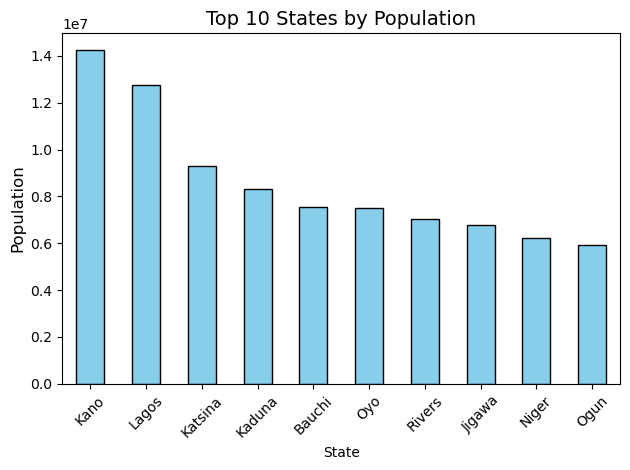

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame `df` is already created
# Get the top 10 states by population
top_ten_states = df.sort_values('Population', ascending=False).head(10)

# Plot the top 10 states
plt.figure(figsize=(10, 6))
top_ten_states.plot(
    x='State', 
    y='Population', 
    kind='bar', 
    color='skyblue', 
    edgecolor='black', 
    legend=False
)
plt.title('Top 10 States by Population', fontsize=14)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


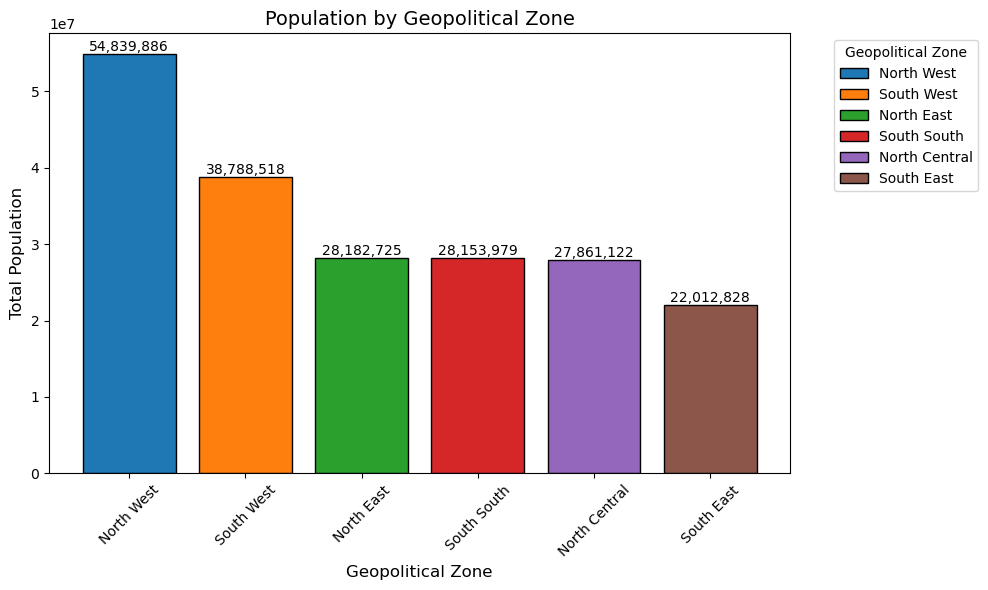

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    "State": [
        "Abia", "Adamawa", "Akwa Ibom", "Anambra", "Bauchi", "Bayelsa", "Benue", "Borno",
        "Cross River", "Delta", "Ebonyi", "Edo", "Ekiti", "Enugu", "Federal Capital Territory",
        "Gombe", "Imo", "Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi", "Kogi", "Kwara",
        "Lagos", "Nasarawa", "Niger", "Ogun", "Ondo", "Osun", "Oyo", "Plateau", "Rivers",
        "Sokoto", "Taraba", "Yobe", "Zamfara"
    ],
    "Geopolitical zone": [
        "South East", "North East", "South South", "South East", "North East", "South South",
        "North Central", "North East", "South South", "South South", "South East", "South South",
        "South West", "South East", "North Central", "North East", "South East", "North West",
        "North West", "North West", "North West", "North West", "North Central", "North Central",
        "South West", "North Central", "North Central", "South West", "South West", "South West",
        "South West", "North Central", "South South", "North West", "North East", "North East",
        "North West"
    ],
    "Population": [
        3841943, 4536948, 4780581, 5599910, 7540663, 2394725, 5787706, 5751590, 4175020,
        5307543, 3007155, 4461137, 3350401, 4396098, 1406239, 3623462, 5167722, 6779080,
        8324285, 14253549, 9300382, 5001610, 4153734, 3259613, 12772884, 2632239, 6220617,
        5945275, 4969707, 4237396, 7512855, 4400974, 7034973, 5863187, 3331885, 3398177, 5317793
    ]
}

df = pd.DataFrame(data)

# Group by Geopolitical zone and sum the Population
grouped_data = df.groupby("Geopolitical zone")["Population"].sum().sort_values(ascending=False)

# Plot the data with different colors for each bar and add a legend and labels
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data.values, color=plt.cm.tab10.colors[:len(grouped_data)], edgecolor="black")

# Add labels to each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add title, labels, and legend
plt.title("Population by Geopolitical Zone", fontsize=14)
plt.xlabel("Geopolitical Zone", fontsize=12)
plt.ylabel("Total Population", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(bars, grouped_data.index, title="Geopolitical Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [47]:
# df= pd.read_html('https://en.wikipedia.org/wiki/States_of_Nigeria')
# df= df[4]

In [48]:
# df.head()

Name ISO 3166-2 code Seal Location     City           \
        Name ISO 3166-2 code Seal Location  Capital  Largest   
0       Abia              AB  NaN      NaN  Umuahia      Aba   
1    Adamawa              AD  NaN      NaN     Yola     Yola   
2  Akwa Ibom              AK  NaN      NaN      Uyo      Uyo   
3    Anambra              AN  NaN      NaN     Awka  Onitsha   
4     Bauchi              BA  NaN      NaN   Bauchi   Bauchi   

  Geopolitical zone                       Area Population (2019 estimate)[4]  
  Geopolitical zone                       Area Population (2019 estimate)[4]  
0        South East    6,320 km2 (2,440 sq mi)                       3841943  
1        North East  36,917 km2 (14,254 sq mi)                       4536948  
2       South South    7,081 km2 (2,734 sq mi)                       4780581  
3        South East    4,844 km2 (1,870 sq mi)                       5599910  
4        North East  45,893 km2 (17,719 sq mi)                       7540663

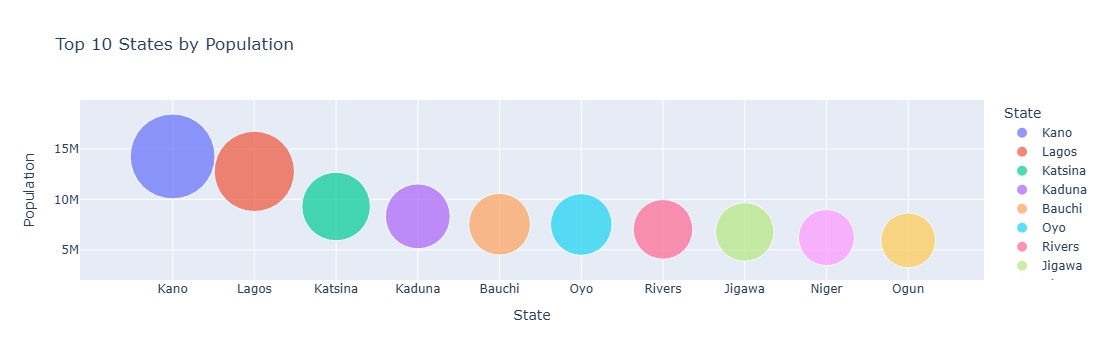

In [7]:
import pandas as pd
import plotly.express as px

# Create the DataFrame
data = {
    "State": [
        "Abia", "Adamawa", "Akwa Ibom", "Anambra", "Bauchi", "Bayelsa", "Benue", "Borno",
        "Cross River", "Delta", "Ebonyi", "Edo", "Ekiti", "Enugu", "Federal Capital Territory",
        "Gombe", "Imo", "Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi", "Kogi", "Kwara",
        "Lagos", "Nasarawa", "Niger", "Ogun", "Ondo", "Osun", "Oyo", "Plateau", "Rivers",
        "Sokoto", "Taraba", "Yobe", "Zamfara"
    ],
    "Geopolitical zone": [
        "South East", "North East", "South South", "South East", "North East", "South South",
        "North Central", "North East", "South South", "South South", "South East", "South South",
        "South West", "South East", "North Central", "North East", "South East", "North West",
        "North West", "North West", "North West", "North West", "North Central", "North Central",
        "South West", "North Central", "North Central", "South West", "South West", "South West",
        "South West", "North Central", "South South", "North West", "North East", "North East",
        "North West"
    ],
    "Population": [
        3841943, 4536948, 4780581, 5599910, 7540663, 2394725, 5787706, 5751590, 4175020,
        5307543, 3007155, 4461137, 3350401, 4396098, 1406239, 3623462, 5167722, 6779080,
        8324285, 14253549, 9300382, 5001610, 4153734, 3259613, 12772884, 2632239, 6220617,
        5945275, 4969707, 4237396, 7512855, 4400974, 7034973, 5863187, 3331885, 3398177, 5317793
    ]
}

df = pd.DataFrame(data)

# Filter top ten states by population
top_ten_states = df.nlargest(10, "Population")

# Create the scatter plot
fig = px.scatter(
    top_ten_states,
    x="State",
    y="Population",
    size="Population",
    color="State",
    hover_name="State",
    title="Top 10 States by Population",
    size_max=60
)
fig.show()


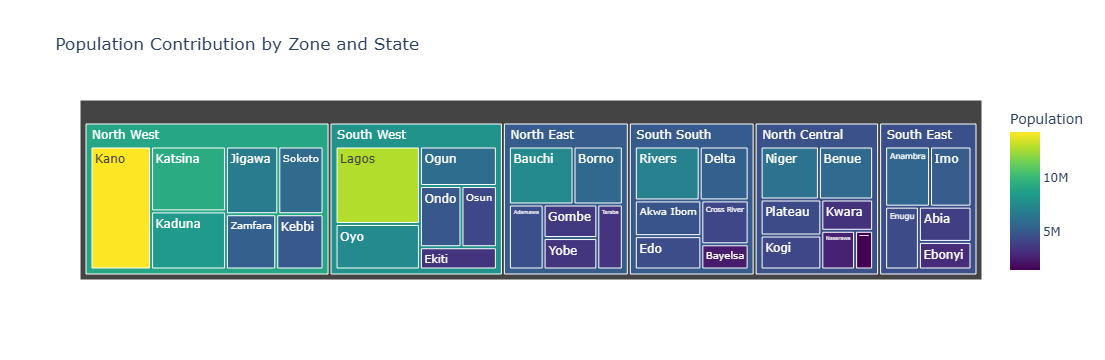

In [143]:
fig = px.treemap(df, 
                 path=["Geopolitical zone", "State"], 
                 values="Population", 
                 title="Population Contribution by Zone and State",
                 color="Population",
                 color_continuous_scale="Viridis")
fig.show()
